<h1> Sales Analysis using the Pandas library

<h3> Importing libraries

In [1]:
import pandas as pd
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<h3> Iterating through the folder and merging all the files into one.

In [2]:
all_sales_files = sorted(glob('Sales*.csv'))
df = pd.concat((pd.read_csv(file) for file in all_sales_files), ignore_index=True)
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


<h3> Cleaning and Preparation process

In [3]:
df.isnull().sum() # It seems that the null values are in fact null lines, since all columns has the same number os null values

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [4]:
df[df['Order ID'].isnull()] # Confirming the above

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
185176,NaN,NaN,NaN,NaN,NaN,NaN
185438,NaN,NaN,NaN,NaN,NaN,NaN
186042,NaN,NaN,NaN,NaN,NaN,NaN
186548,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.dropna(how='all', inplace=True) # Deleting the lines where all the columns are null

In [6]:
temp_df = df[df['Order Date'].str[0:2] == 'Or'] # Eliminating the Or in the Month column
temp_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [7]:
df.set_index('Order ID')

,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
Order ID,,,,,
176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...
259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"


In [8]:
df.groupby('Order ID').count()

,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
Order ID,,,,,
141234,1,1,1,1,1
141235,1,1,1,1,1
141236,1,1,1,1,1
141237,1,1,1,1,1
141238,1,1,1,1,1
...,...,...,...,...,...
319667,1,1,1,1,1
319668,1,1,1,1,1
319669,1,1,1,1,1


In [9]:
df.drop(df[df['Order ID']== 'Order ID'].index, inplace=True)

In [10]:
# Changing Order Date to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])  
df.dtypes

Order ID                    object
Product                     object
Quantity Ordered            object
Price Each                  object
Order Date          datetime64[ns]
Purchase Address            object
dtype: object

In [11]:
df['Month'] = df['Order Date'].dt.month #Adding month column
df['Month Name'] = df['Order Date'].dt.month_name() #Adding month name column
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Month Name
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,April
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,April
3,176560,Google Phone,1,600,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,April
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,April
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,April


In [12]:
#Changing the Quantity Ordered and Prices to numeric to create Sales column multiplication
df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'])
df['Price Each'] = pd.to_numeric(df['Price Each'])
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Month Name
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,April
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,April
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,April
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,April
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,April


In [13]:
df['Sales'] = df['Quantity Ordered'] * df['Price Each']
pd.options.display.float_format = '{:,.2f}'.format #Defining the adequated format for float columns
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Month Name,Sales
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,April,23.90
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,April,99.99
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,April,600.00
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,April,11.99
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,April,11.99


In [14]:
# Creating the City column adding the State ID
df['City'] = df['Purchase Address'].apply(lambda st: st.split(',')[1] + ' ' + st.split(',')[2].split(' ')[-2])  
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Month Name,Sales,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,April,23.90,Dallas TX
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,April,99.99,Boston MA
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,April,600.00,Los Angeles CA
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,April,11.99,Los Angeles CA
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,April,11.99,Los Angeles CA


<h3> Sales Analysis Process

In [15]:
# Grouping quantity columns by month
annual_sales = df.groupby('Month').sum()
annual_sales

,Quantity Ordered,Price Each,Sales
Month,,,
1,10903,"1,811,768.38","1,822,256.73"
2,13449,"2,188,884.72","2,202,022.42"
3,17005,"2,791,207.83","2,807,100.38"
4,20558,"3,367,671.02","3,390,670.24"
5,18667,"3,135,125.13","3,152,606.75"
6,15253,"2,562,025.61","2,577,802.26"
7,16072,"2,632,539.56","2,647,775.76"
8,13448,"2,230,345.42","2,244,467.88"
9,13109,"2,084,992.09","2,097,560.13"


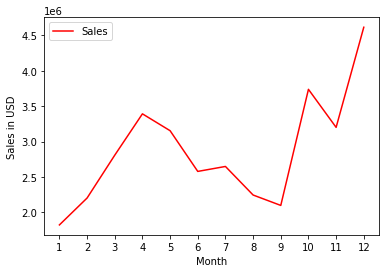

In [16]:
# Chart for monthly sales
months = range(1,13)

plt.plot(months, annual_sales['Sales'], color='r')
plt.xticks(months)
plt.ylabel('Sales in USD')
plt.xlabel('Month')
plt.legend(labels=['Sales'])

In [17]:
# Creating pivot table for total sales by city
city_sales = df.pivot_table(index='City', values='Sales', aggfunc=np.sum)
city_sales

,Sales
City,
Atlanta GA,"2,795,498.58"
Austin TX,"1,819,581.75"
Boston MA,"3,661,642.01"
Dallas TX,"2,767,975.40"
Los Angeles CA,"5,452,570.80"
New York City NY,"4,664,317.43"
Portland ME,"449,758.27"
Portland OR,"1,870,732.34"
San Francisco CA,"8,262,203.91"


Text(0.5, 0, 'Cities')

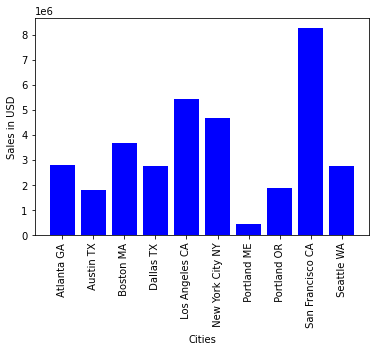

In [18]:
# Chart for sales by city
cities = [city for city, df in df.groupby('City')]

plt.bar(cities, city_sales['Sales'], color='b')
plt.xticks(cities, rotation='vertical')
plt.ylabel('Sales in USD')
plt.xlabel('Cities')

In [19]:
# Adding hour column from a datetime 
df['Hour'] = df[('Order Date')].dt.hour
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Month Name,Sales,City,Hour
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,April,23.90,Dallas TX,8
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,April,99.99,Boston MA,22
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,April,600.00,Los Angeles CA,14
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,April,11.99,Los Angeles CA,14
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,April,11.99,Los Angeles CA,9
...,...,...,...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",9,September,8.97,Los Angeles CA,20
186846,259354,iPhone,1,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",9,September,700.00,San Francisco CA,16
186847,259355,iPhone,1,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",9,September,700.00,San Francisco CA,7
186848,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",9,September,379.99,San Francisco CA,17


Text(0.5, 1.0, 'Number of Orders')

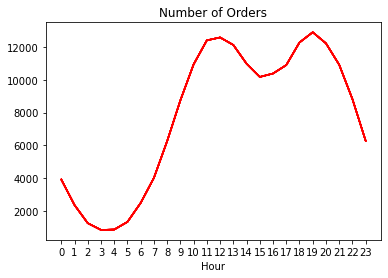

In [20]:
# Chart for number of orders per each hour
hours = [hour for hour, df in df.groupby('Hour')]

plt.plot(hours, df.groupby(['Hour']).count(), color='r')
plt.xticks(hours)
plt.xlabel('Hour')
plt.title('Number of Orders')

In [21]:
#Number of orders per city
df.groupby('City').size().sort_values(ascending=False)

City
 San Francisco CA    44732
 Los Angeles CA      29605
 New York City NY    24876
 Boston MA           19934
 Atlanta GA          14881
 Dallas TX           14820
 Seattle WA          14732
 Portland OR         10010
 Austin TX            9905
 Portland ME          2455
dtype: int64

In [22]:
set(list(df['City']))

{' Atlanta GA',
 ' Austin TX',
 ' Boston MA',
 ' Dallas TX',
 ' Los Angeles CA',
 ' New York City NY',
 ' Portland ME',
 ' Portland OR',
 ' San Francisco CA',
 ' Seattle WA'}

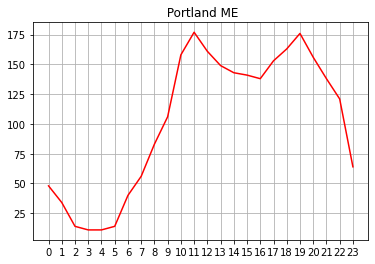

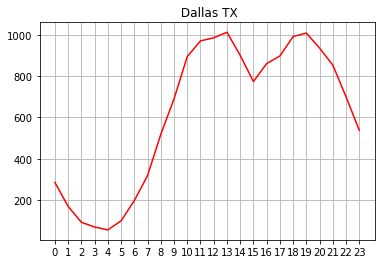

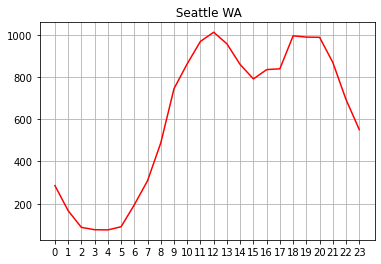

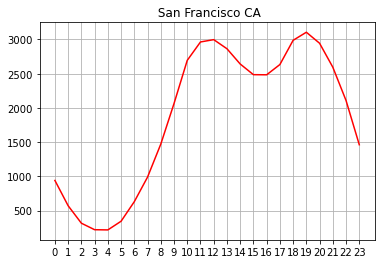

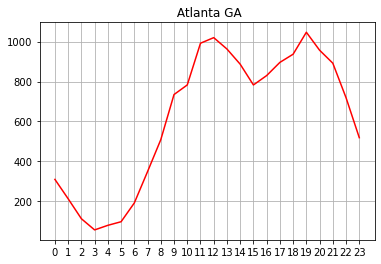

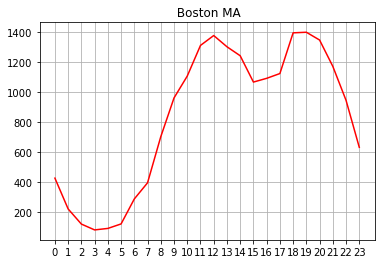

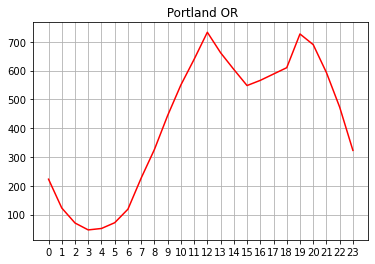

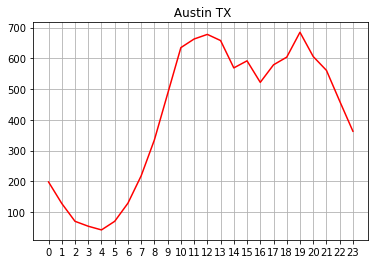

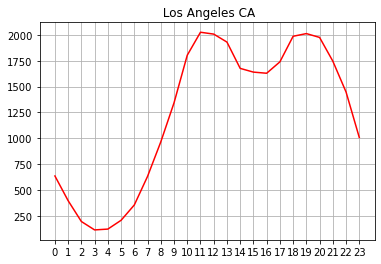

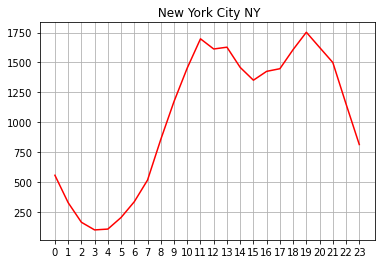

In [23]:
cities = set(list(df['City']))

for city in cities:
    plt.plot(hours, df['Hour'].loc[df['City'] == city].groupby(df['Hour']).count(), color='r')
    plt.title(city)
    plt.xticks(range(0,24))
    plt.grid()
    plt.show()

In [24]:
df.groupby('City').agg({'Sales':[np.average, np.sum]})

Sales             
                  average          sum
City                                  
 Atlanta GA        187.86 2,795,498.58
 Austin TX         183.70 1,819,581.75
 Boston MA         183.69 3,661,642.01
 Dallas TX         186.77 2,767,975.40
 Los Angeles CA    184.18 5,452,570.80
 New York City NY  187.50 4,664,317.43
 Portland ME       183.20   449,758.27
 Portland OR       186.89 1,870,732.34
 San Francisco CA  184.70 8,262,203.91
 Seattle WA        186.52 2,747,755.48

<AxesSubplot:ylabel='Product'>

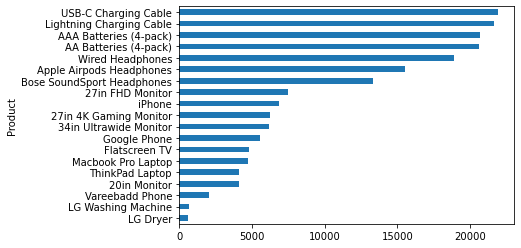

In [25]:
#Number of orders per Product
df.groupby('Product').size().sort_values(ascending=True).plot.barh()

<h3> Exporting the consolidated file as .csv

In [26]:
df.to_csv('consolidated_sales.csv', index=False)